# Notebook imports

In [34]:
from os import walk    #to use walk from system os
from os.path import join

import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline


# Constants

In [29]:
EXAMPLE_FILE = 'SpamData/01_Processing/practice_email.txt'

spam_1_path = 'SpamData/01_Processing/spam_assassin_corpus/spam_1'
spam_2_path = 'SpamData/01_Processing/spam_assassin_corpus/spam_1'
easy_nonspam_1_path = 'SpamData/01_Processing/spam_assassin_corpus/easy_ham_1'
easy_nonspam_2_path = 'SpamData/01_Processing/spam_assassin_corpus/easy_ham_2'

SPAM_CAT = 1
HAM_CAT = 0

DATA_JSON_FILE = 'SpamData/01_Processing/email-text-data.json'

# Reading files

In [3]:
stream = open(EXAMPLE_FILE,encoding='latin-1')
message = stream.read()
stream.close()

print(type(message))
print(message)

<class 'str'>
From exmh-workers-admin@redhat.com  Thu Aug 22 12:36:23 2002
Return-Path: <exmh-workers-admin@spamassassin.taint.org>
Delivered-To: zzzz@localhost.netnoteinc.com
Received: from localhost (localhost [127.0.0.1])
	by phobos.labs.netnoteinc.com (Postfix) with ESMTP id D03E543C36
	for <zzzz@localhost>; Thu, 22 Aug 2002 07:36:16 -0400 (EDT)
Received: from phobos [127.0.0.1]
	by localhost with IMAP (fetchmail-5.9.0)
	for zzzz@localhost (single-drop); Thu, 22 Aug 2002 12:36:16 +0100 (IST)
Received: from listman.spamassassin.taint.org (listman.spamassassin.taint.org [66.187.233.211]) by
    dogma.slashnull.org (8.11.6/8.11.6) with ESMTP id g7MBYrZ04811 for
    <zzzz-exmh@spamassassin.taint.org>; Thu, 22 Aug 2002 12:34:53 +0100
Received: from listman.spamassassin.taint.org (localhost.localdomain [127.0.0.1]) by
    listman.redhat.com (Postfix) with ESMTP id 8386540858; Thu, 22 Aug 2002
    07:35:02 -0400 (EDT)
Delivered-To: exmh-workers@listman.spamassassin.taint.org
Received: fro

In [4]:
import sys
sys.getfilesystemencoding()

'utf-8'

In [5]:
stream = open(EXAMPLE_FILE,encoding='latin-1')

is_body = False
lines = []

for line in stream:
    if is_body:
        lines.append(line)
    elif line == '\n':   # try printing lines directly, to remove new line character
        is_body = True 
    
stream.close()

email_body = '\n'.join(lines)
print(email_body)




Dear Mr Still



Good tidings to you and all your staff for the festive season ahead (Christmas).

Now to the crux of the matter-in-hand: I am a fully qualified Santa Claus and am wondering whether you might consider me to run my own "Santa's Grotto" in your store.

But WAIT! You're probably thinking: "What makes him so special?"

Well, first of all, I have made several changes to the characterisation of Father Christmas. Rather than greeting the children with shouts of "Ho, ho, ho!" I prefer to whisper the phrase "Dependence is not unfathomable in this cruel world we live in". In addition, my gifts are ALL hand-made, ranging from felt hoops to vanilla-pod holders.

You will note also, from the enclosed sketch, that I have radically redesigned Santa's outfit and have renamed my character "Lord Buckles". Would you be interested in employing me? I promise NEVER to let you down.

I look forward to hearing from you.



Best wishes

Robin Cooper

[Excerpt from the book: The Timewaster Let

# Generator function

In [6]:
def generate_squares(N):
    for my_number in range(N):
        yield(my_number**2)

In [7]:
for i in generate_squares(3):
    print(i,end='->')

0->1->4->

## Email body extraction(5.11-5.12)

In [8]:
def email_body_generator(path):
    
    for root, dirnames, filenames in walk(path):
        for file_name in filenames:
            
            filepath = join(root,file_name)
            
            stream = open(filepath,encoding='latin-1')

            is_body = False
            lines = []

            for line in stream:
                if is_body:
                    lines.append(line)
                elif line == '\n':   # try printing lines directly, to remove new line character
                    is_body = True 
    
            stream.close()

            email_body = '\n'.join(lines)
            
            yield file_name,email_body

         

In [9]:
def df_from_directory(path,classification):
    rows = []
    row_names = []
    
    for file_name,email_body in email_body_generator(path):
        rows.append({'Message':email_body,'Category':classification})
        row_names.append(file_name)
    return pd.DataFrame(rows , index=row_names)    
        

In [10]:
spam_emails = df_from_directory(spam_1_path,SPAM_CAT)

#adding other files namely spam 2,easyham1,2
spam_emails = spam_emails.append(df_from_directory(spam_2_path,SPAM_CAT))


spam_emails.head()

,Category,Message
00001.7848dde101aa985090474a91ec93fcf0,1,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr..."
00002.d94f1b97e48ed3b553b3508d116e6a09,1,1) Fight The Risk of Cancer!\n\nhttp://www.adc...
00003.2ee33bc6eacdb11f38d052c44819ba6c,1,1) Fight The Risk of Cancer!\n\nhttp://www.adc...
00004.eac8de8d759b7e74154f142194282724,1,##############################################...
00005.57696a39d7d84318ce497886896bf90d,1,I thought you might like these:\n\n1) Slim Dow...


In [11]:
spam_emails.shape

(1002, 2)

In [12]:
ham_emails = df_from_directory(easy_nonspam_1_path,HAM_CAT)
ham_emails = ham_emails.append(df_from_directory(easy_nonspam_2_path,HAM_CAT))

ham_emails.shape

(3901, 2)

In [13]:
data = pd.concat([spam_emails,ham_emails])
print(data.shape)
data.head()

(4903, 2)


,Category,Message
00001.7848dde101aa985090474a91ec93fcf0,1,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr..."
00002.d94f1b97e48ed3b553b3508d116e6a09,1,1) Fight The Risk of Cancer!\n\nhttp://www.adc...
00003.2ee33bc6eacdb11f38d052c44819ba6c,1,1) Fight The Risk of Cancer!\n\nhttp://www.adc...
00004.eac8de8d759b7e74154f142194282724,1,##############################################...
00005.57696a39d7d84318ce497886896bf90d,1,I thought you might like these:\n\n1) Slim Dow...


In [14]:
data.tail()

,Category,Message
01396.61983fbe6ec43f55fd44e30fce24ffa6,0,http://news.bbc.co.uk/1/hi/england/2515127.stm...
01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7,0,"> >-- be careful when using this one.) Also, t..."
01398.169b51731fe569f42169ae8f948ec676,0,">>>>> ""SM"" == Skip Montanaro <skip@pobox.com> ..."
01399.ca6b00b7b341bbde9a9ea3dd6a7bf896,0,"So then, ""Mark Hammond"" <mhammond@skippinet.co..."
01400.f897f0931e461e7b2e964d28e927c35e,0,"Hi there,\n\n\n\nNow this is probably of no us..."


# Data cleaning: checking for missing values 

In [15]:
#check if any message bodies are null
data['Message'].isnull().values.any()

False

In [16]:
my_var = None
type(my_var)

NoneType

In [17]:
# check for empty mails
(data.Message.str.len()==0).any()

True

In [18]:
(data.Message.str.len()==0).sum()

3

In [19]:
data.Message.isnull().sum()

0

### Locate empty emails

In [20]:
type(data.Message.str.len()==0)

pandas.core.series.Series

In [21]:
data[data.Message.str.len()==0].index

Index(['cmds', 'cmds', 'cmds'], dtype='object')

## Remove system file entries

In [22]:
data = data.drop(['cmds'])  #or data.drop(['cmds'],inplace = True)

In [23]:
data.shape

(4900, 2)

## Add document ids to track email in dataset

In [24]:
document_ids = range(0,len(data.index))
document_ids

range(0, 4900)

In [25]:
data['DOC_ID']= document_ids

In [26]:
data.DOC_ID

00001.7848dde101aa985090474a91ec93fcf0       0
00002.d94f1b97e48ed3b553b3508d116e6a09       1
00003.2ee33bc6eacdb11f38d052c44819ba6c       2
00004.eac8de8d759b7e74154f142194282724       3
00005.57696a39d7d84318ce497886896bf90d       4
00006.5ab5620d3d7c6c0db76234556a16f6c1       5
00007.d8521faf753ff9ee989122f6816f87d7       6
00008.dfd941deb10f5eed78b1594b131c9266       7
00009.027bf6e0b0c4ab34db3ce0ea4bf2edab       8
00010.445affef4c70feec58f9198cfbc22997       9
00011.61816b9ad167657773a427d890d0468e      10
00012.381e4f512915109ba1e0853a7a8407b2      11
00013.d3f0b591a65f116ea5d9d4ad919f83aa      12
00014.7d38c46424f24fc8012ac15a95a2ac14      13
00015.048434ab64c86cf890eda1326a5643f5      14
00016.67fb281761ca1051a22ec3f21917e7c0      15
00017.1a938ecddd047b93cbd7ed92c241e6d1      16
00018.5b2765c42b7648d41c93b9b27140b23a      17
00019.bbc97ad616ffd06e93ce0f821ca8c381      18
00020.29725cf331fc21e18a1809e7d8b27332      19
00021.effe1449462a9d7ad7af0f1c94b1a237      20
00022.8203cdf

In [27]:
data['FILE_NAME'] = data.index
data = data.set_index('DOC_ID')

data.head()

,Category,Message,FILE_NAME
DOC_ID,,,
0,1,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",00001.7848dde101aa985090474a91ec93fcf0
1,1,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,00002.d94f1b97e48ed3b553b3508d116e6a09
2,1,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,00003.2ee33bc6eacdb11f38d052c44819ba6c
3,1,##############################################...,00004.eac8de8d759b7e74154f142194282724
4,1,I thought you might like these:\n\n1) Slim Dow...,00005.57696a39d7d84318ce497886896bf90d


## Save to file using pandas(5.15)

In [30]:
data.to_json(DATA_JSON_FILE)

## No. of messages visualised(pie charts)(5.16-5.17)

In [31]:
data.Category.value_counts()

0    3900
1    1000
Name: Category, dtype: int64

In [59]:
amount_of_spam = data.Category.value_counts()[1]
amount_of_ham = data.Category.value_counts()[0]

custom_colours = ['#ff7675','#74b9ff'] 

In [36]:
category_names = ['spam' , 'legit mail']
sizes = [amount_of_spam,amount_of_ham]

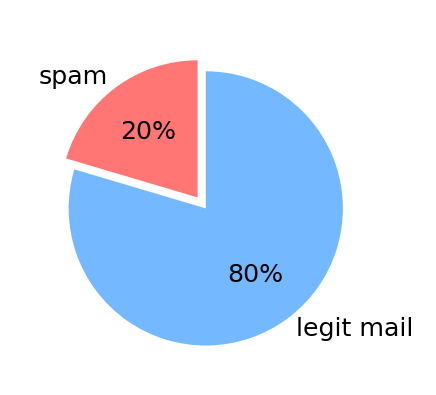

In [68]:
plt.figure(figsize=(2,2),dpi=227)
plt.pie(sizes,labels=category_names,textprops={'fontsize':8},
        startangle=90 , autopct='%1.0f%%',colors=custom_colours,
        explode = [0,0.1])
plt.show()

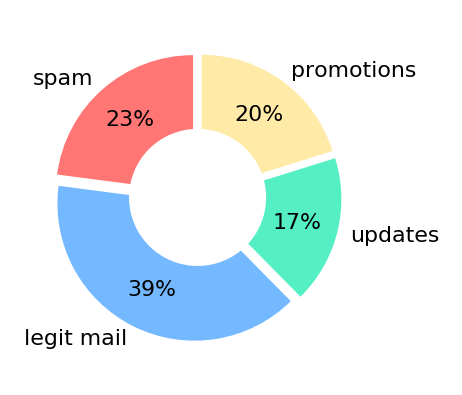

In [81]:
category_names = ['spam' , 'legit mail','updates','promotions']
sizes = [25,43,19,22]
custom_colours = ['#ff7675','#74b9ff','#55efc4','#ffeaa7']   

plt.figure(figsize=(2,2),dpi=227)
plt.pie(sizes,labels= category_names,textprops={'fontsize':7},
        startangle=90 , autopct='%1.0f%%',colors=custom_colours,pctdistance=0.7
       ,explode=[0.05,.05,.05,.05])

# draw circle  
centre_circle = plt.Circle((0,0),radius= 0.5,fc = 'white')
plt.gca().add_artist(centre_circle)

plt.show()